# <center> Assignment 6 - AI4LR
### <center> Total 60 (50 Questions, 10 Presentation)

---

In [1]:
## Inportant
Your_Name = "Shubh Pathak "
Your_Email_id = "shubhpathakpro@gmail.com"

## Open this notebook in kaggle for easy access to the dataset and related libraries. 

In [58]:
# importing libraries
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from numpy import asarray
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Data 

To get the dataset for this assignment, got to Add data option and search for https://www.kaggle.com/datasets/datatangai/people-with-occlusion-and-multipose-face-data in Search URL field.

Import this dataset and there is only one image in this dataset. We are going to use this image only. 

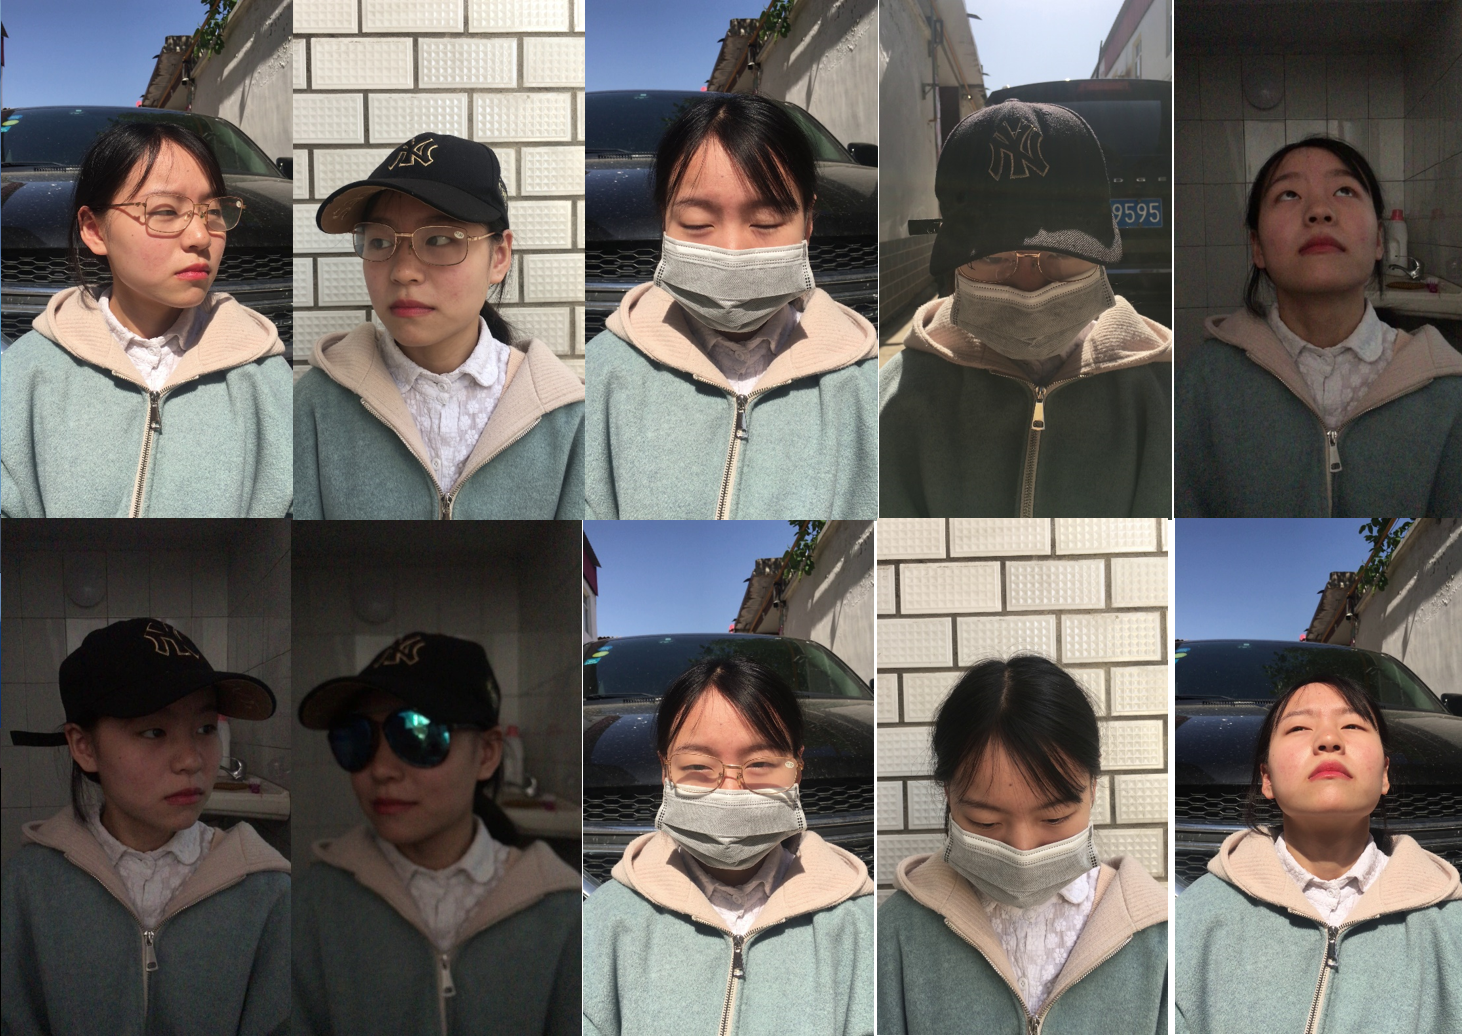

In [3]:
img_path = "../input/people-with-occlusion-and-multipose-face-data/3.png"

img = Image.open(img_path)

img

#### Q1 [1 Point]

Convert the images "img" into an array and store that array into 'img_arr' variable.

Plot the img_arr using plt


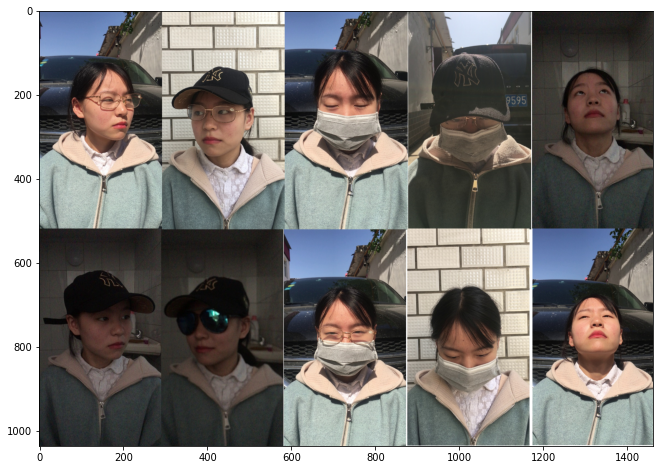

In [11]:
# Complete the following code

img_arr = asarray(img)

# plot img_arr
plt.figure(figsize = (15,8))
plt.imshow(img_arr)
plt.show()


#### Q2 [2 Points]
Run the below code.

Do you see anything abnormal with the shape of the above image? If yes, state the reason. 

In [57]:
print("Image shape:", img_arr.shape)

## print your reason here

reason = "Yes, it is clear that there are 4 channels of images rather than just 3.In 4 channel image the 4th channel denotes level of transparency or opaqueness. "

print(reason)

Image shape: (1036, 1462, 3)
Yes, it is clear that there are 4 channels of images rather than just 3.In 4 channel image the 4th channel denotes level of transparency or opaqueness. 


#### Q3 [6 Points]
The above image "img_arr" is a combination of ten different images, separate all ten images using numpy and show all of them using plt.subplot.

(the size and shape of individual images should remain the same)

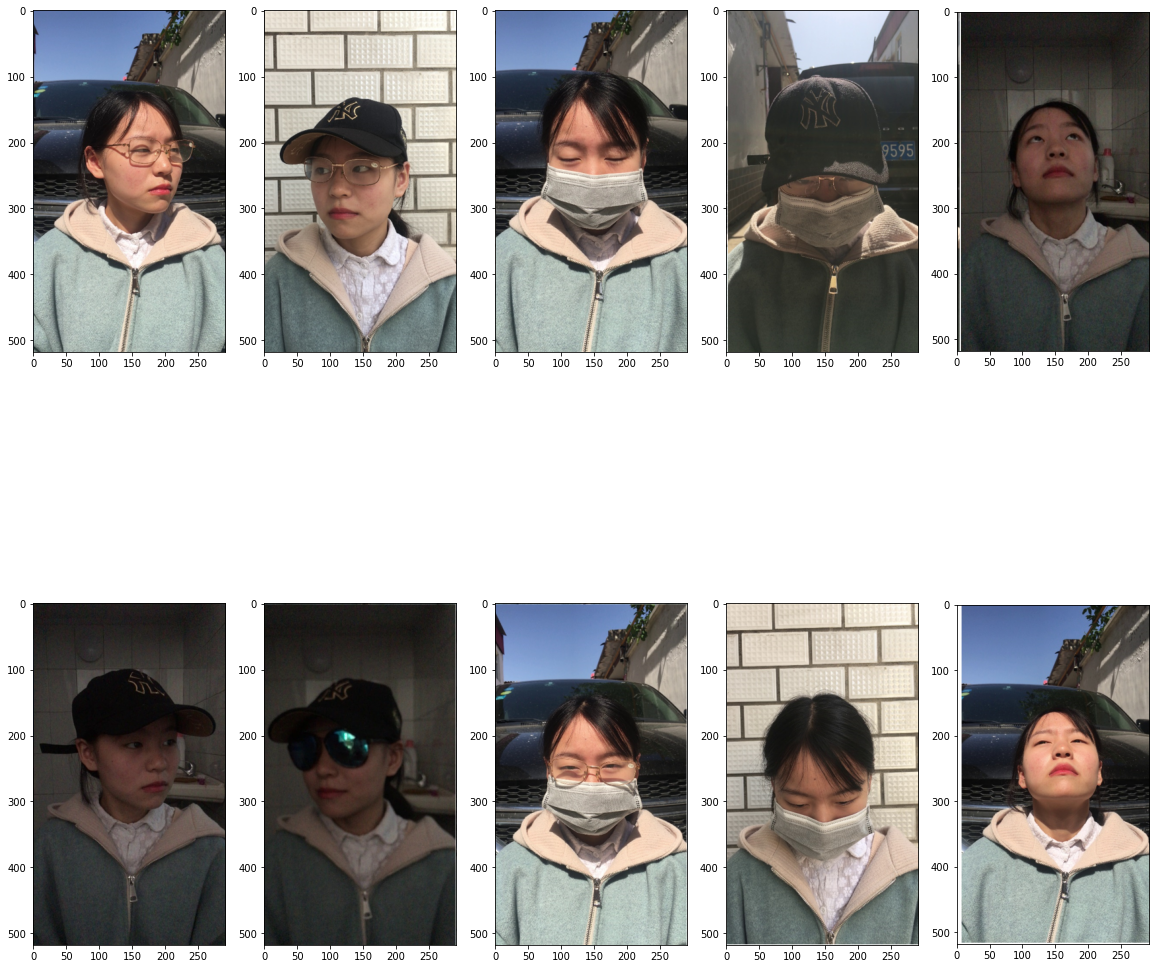

In [55]:
# first we are converting our four channels image into three channels image (easy to use and no extra complexities)
'''Do not make any change in this below line of code.'''
img_arr = img_arr[:, :, :3]


# Write your code here--------------------------->
rows=2
columns=5
M = img_arr.shape[0]//rows  # division lines for the picture
N = img_arr.shape[1]//columns
# now slice up the image (in a shape that works well with subplots)

# tiles1 = [img_arr[0:M,x*N:(x+1)*N] for x in range(0,4) ]
# tiles1=tiles1.append(img_arr[0:M, 4*N:])
# tiles2=[img_arr[M:,x*N:(x+1)*N] for x in range(0,4) ]
# tiles2=tiles2.append(img_arr[M:, 4*N:])
# f_tiles=tiles1+tiles2
# I dont know why it is not working


tiles = [[img_arr[0:M, 0:N], img_arr[0:M, N:2*N],img_arr[0:M, 2*N:3*N],img_arr[0:M, 3*N:4*N],img_arr[0:M, 4*N:]], [img_arr[M:, 0:N], img_arr[M:, N:2*N],img_arr[M:, 2*N:3*N],img_arr[M:, 3*N:4*N],img_arr[M:, 4*N:]]]

k = 1

plt.figure(figsize=(20,20))

for i in range(2):
    j=0
    while j<5:
        fig = plt.subplot(2,5,k)
        plt.imshow(tiles[i][j])
        j+=1
        k+= 1
        
         

#### Q4 [2 Points]
imgGray = ** 0.2989 * R + 0.5870 * G + 0.1140 * B **. 

this is the formula to convert any colored images to greyscale. 


Convert "first" into greyscale using above formula and store it in "first_bw"

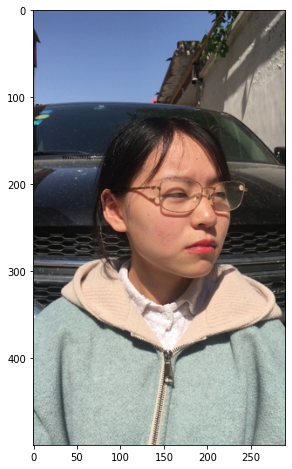

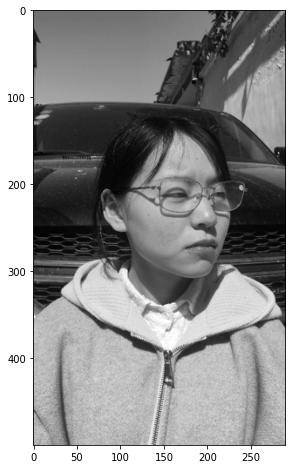

In [30]:
first = img_arr[:500, :290, :]

plt.figure(figsize = (15,8))
plt.imshow(first)
plt.show()

## Write your code here
R, G, B = first[:,:,0], first[:,:,1], first[:,:,2]
first_bw = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.figure(figsize = (15,8))
plt.imshow(first_bw, cmap='gray')
plt.show()


#### Q5 [6 Points]
Find out the effects of kernel1 and kernel2 on the "first" using cv2.filter2D function. 

Plot and State the difference between effect1 and effect2.


The difference between these two effects is that in effect 1, the horizontal features and edges are emphasised, whereas in effect 2, every vertical feature will be highlighted because the kernel has been transposed.


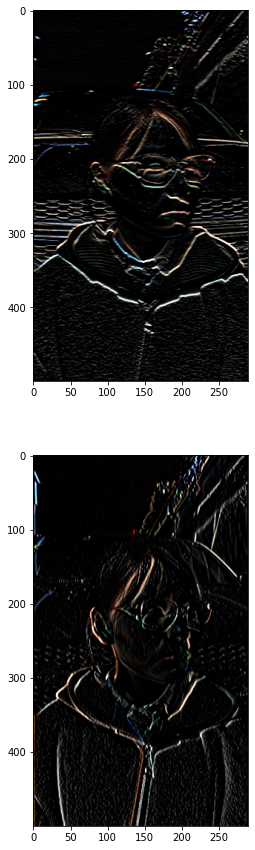

In [45]:
kernel1 = np.array([[-1,-1,-1],
                    [0,0,0],
                    [1,1,1]])

kernel2 = kernel1.transpose()


effect1 = cv2.filter2D(src = first, kernel = kernel1, ddepth = -1)
effect2 = cv2.filter2D(src = first, kernel = kernel2, ddepth = -1)

# plot effect1 and effect2 using plt.subplots
fig , ax = plt.subplots(2,1,figsize=(15, 15))

ax[0].imshow(effect1)
ax[1].imshow(effect2)

# state the difference

difference = "The difference between these two effects is that in effect 1, the horizontal features and edges are emphasised, whereas in effect 2, every vertical feature will be highlighted because the kernel has been transposed."
print(difference)


#### Q6 [10 Points]

State differences between -  

> Feature extraction and finetuning in transfer learning [2]

> Hidden layer in a neural network and Head layer in transfer learning [2]

> Instance Segmentation and Sementic Segmentation [2]

> Conv2DTranspose and UpSAmpling2D layers (along with examples - image explanations are highly appreciated) [4]

#### start your answer here

### 6.)
## 1.Feature extraction and finetuning in transfer learning-

Feature Extraction: Use the representations learned by a previous network to extract meaningful features from new samples. You simply add a new classifier, which will be trained from scratch, on top of the pretrained model so that you can repurpose the feature maps learned previously for the dataset.

You do not need to (re)train the entire model. The base convolutional network already contains features that are generically useful for classifying pictures. However, the final, classification part of the pretrained model is specific to the original classification task, and subsequently specific to the set of classes on which the model was trained.

Fine-Tuning: Unfreeze a few of the top layers of a frozen model base and jointly train both the newly-added classifier layers and the last layers of the base model. This allows us to "fine-tune" the higher-order feature representations in the base model in order to make them more relevant for the specific task.

In finetuning, we start with a pretrained model and update all of the model's parameters for our new task, in essence retraining the whole model. In feature extraction, we start with a pretrained model and only update the final layer weights from which we derive predictions.

## 2.Hidden layer in a neural network and Head layer in transfer learning-

In neural networks, a hidden layer is located between the input and output of the algorithm, in which the function applies weights to the inputs and directs them through an activation function as the output. In short, the hidden layers perform nonlinear transformations of the inputs entered into the network.


We take a network which is very good at detecting objects and customize it. In other words, we take a pre-trained model, e.g., ResNet trained on ImageNet. The existing network’s starting layers focus on detecting ears, eyes, or fur, which will help detect cats and dogs. 
We then cut the last few layers (called the head) specialized in a particular task and replace it with a fully connected layer or a few random layers.

## 3.Instance Segmentation and Sementic Segmentation:-

Semantic segmentation-Objects shown in an image are grouped based on defined categories. For instance, a street scene would be segmented by “pedestrians,” “bikes,” “vehicles,” “sidewalks,” and so on.


Instance segmentation-Consider instance segmentation a refined version of semantic segmentation. Categories like “vehicles” are split into “cars,” “motorcycles,” “buses,” and so on — instance segmentation detects the instances of each category.


Semantic segmentation treats multiple objects within a single category as one entity, whereas instance segmentation on the other hand, identifies individual objects within these categories.

## 4.UpSampling2D is just a simple scaling up of the image by using nearest neighbour or bilinear upsampling, so nothing smart. Advantage is it's cheap.

Conv2DTranspose is a convolution operation whose kernel is learnt (just like normal conv2d operation) while training your model. 

Using Conv2DTranspose will also upsample its input but the key difference is the model should learn what is the best upsampling for the job.

upsample layer(UpSampling2D) simply doubles the dimensions of the input and the transpose convolutional layer (Conv2DTranspose) performs an inverse convolution operation.








#### Q7 [5 Points]
Explain the code given below line by line and predict the output
```
input = tf.random.uniform((1, 2, 4, 3))

trans_conv1 = tf.keras.layers.Conv2DTranspose(2, 5, 1 , 'valid')

output = trans_conv1(input)

print(output)
```

In [65]:
#Copy the above code and explain it in comments also explain the output.

input = tf.random.uniform((1, 2, 4, 3))  # Here 1 denotes the batch size, and the input image is 2 x 4 with 3 channels.
trans_conv1 = tf.keras.layers.Conv2DTranspose(2, 5, 1 , 'valid')  # We set the filter size to 2 x 2, kernel size to 5 x 5 and stride as 1 and padding = 'valid'

output = trans_conv1(input) # Transpose convolution is performed

print(output)

print("Explanation-The feature map is larger than the original image, as can be seen in the output. Thus, the transpose convolution approach upsamples the input image.")

tf.Tensor(
[[[[ 0.12923485 -0.17823349]
   [-0.15902236 -0.100155  ]
   [ 0.01474947 -0.65644366]
   [-0.22622395 -0.351187  ]
   [-0.58370906 -0.52981216]
   [-0.2823248  -0.41651937]
   [-0.25729775 -0.03729035]
   [-0.16892669 -0.15205842]]

  [[ 0.36202934  0.04514576]
   [-0.301419   -0.3044596 ]
   [-0.3542571  -0.529873  ]
   [-0.53117234 -0.33716524]
   [-0.82246923 -0.40461302]
   [-0.564373   -0.2660948 ]
   [ 0.03060272  0.09867311]
   [ 0.08818337 -0.20785056]]

  [[-0.03472491  0.01916477]
   [-0.00367579 -0.1505636 ]
   [-0.12409405 -0.3548013 ]
   [ 0.35861427 -0.31432778]
   [ 0.6143375  -0.15649238]
   [ 0.67330074 -0.05009601]
   [ 0.39791346  0.10171337]
   [ 0.14526689  0.21650368]]

  [[-0.2957441  -0.02920362]
   [-0.20808955 -0.29495838]
   [ 0.30483353 -0.17940742]
   [-0.26404428 -0.2702346 ]
   [ 0.5772182  -0.18640712]
   [ 0.23988797  0.32389346]
   [-0.05103134  0.3758921 ]
   [ 0.04788039  0.25164586]]

  [[ 0.06065167  0.28822392]
   [-0.11892392  0.04115

#### Q8 [18 Points]

This question will test your python skills along with the idea of Conv2D and MaxPool2D layer in Keras. [12]

**Tasks for this question:-**        
**1.** *Ask user for the following inputs:-*
- *Conv2D or MaxPool2D*
- *Image size*
- *Filter size*
- *Strides*               

**2.** *Generate a square image array filled with random integers between 0 and 9 (inclusive):-*
- *If image size provided by user is 5 then the shape of the image should be 5x5* 

**3.** *Generate a square filter array filled with random integers between 0 and 1 (inclusive):-*
- *This filter should only be generated if user chooses Conv2D layer*
- *If the filter size provided by user is 3 then the shape of the filter should be 3x3*

**4.** *Generate the feature map depending on Conv2D or MaxPool2D layer selected by user*
- *Make sure your filter takes account of the strides provided by the user*


**5.** *Display the Original Image, Filter (if Conv2D layer) and the Feature Map*

**6.** *Your code should not produce any errors unless you are manually writing code for generating them.*

***Note:-*** *Throughout the question assume that only one filter will be used and padding is set to 'valid'.*

**Output should look something like this:-**

<img src = "https://drive.google.com/uc?id=1UzQrP9537V9Hk9EKYqYpc9s14jBWII3H" height = 40%>

**Explain what are these values on the feature map?** [2]
- *Explain in terms of what does higher/lower value indicate on the feature map*

**What is the purpose of filter in Conv2D layer? Do these values on this filter change while training a CNN?** [4]
- *Explain briefly about it* 

Choose conv for Conv2D and pool for MaxPool2D


conv or pool?:-  conv
image_size:-  5
filter_size:-  3
strides:-  2


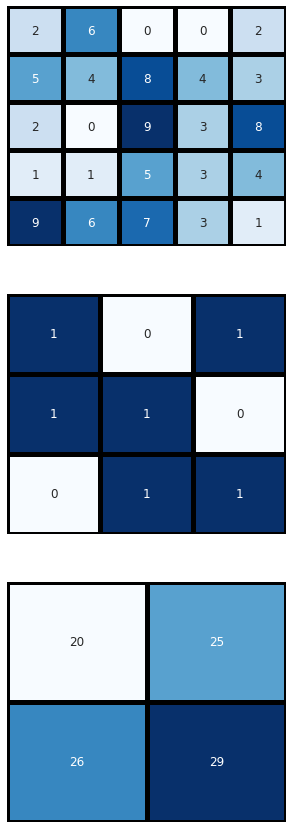

While lower level feature maps detect simple edges and forms, deeper feature maps encode high level notions. Deeper feature maps, as a result, include more information about the image's class than it does about the actual image. The feature maps grow sparser as we go deeper, which means the filters detect fewer features even as they continue to encode relevant features. It makes sense because every image has simple shapes, which are what the filters in the first layers look for. But when we delve more, we begin seeking for more complicated material.
The filters argument sets the number of convolutional filters in that layer. These filters are initialized to small, random values, using the method specified by the kernel_initializer argument. During network training, the filters are updated in a way that minimizes the loss. So over the course of training, the filters will learn to detect certain features, like edges and textures. In a CNN, the values for the various filters in each convo

In [62]:
# Soln 8

# Code below the first bit of the question [12]


print("Choose conv for Conv2D and pool for MaxPool2D")
choice = input("conv or pool?:- ")
image_size = int(input("image_size:- "))
filter_size = int(input("filter_size:- "))
strides = int(input("strides:- "))

img = np.random.randint(0, 10, size = (image_size, image_size))
img1 = img
img = img.reshape((1,image_size, image_size, 1))
finalFilter = None

def createFilter(shape, dtype):
    global finalFilter
    f = np.zeros(shape)
    finalFilter = np.random.randint(0, 2, size = (filter_size, filter_size))
    f[:,:,0,0] = finalFilter
    return f



model = tf.keras.Sequential()


sns.set(rc={'figure.figsize':(5, 15)})
plt.subplot(3, 1, 1)
plt.axis(False)
sns.heatmap(img1, annot = True, cmap="Blues", cbar=False, linewidths = 5, linecolor='black')

if choice == "conv":
    layer = tf.keras.layers.Conv2D(1,
                               kernel_size = (filter_size, filter_size),
                               input_shape = (image_size, image_size, 1), 
                               kernel_initializer = createFilter, 
                               strides = strides, 
                               padding = "VALID")
    layer.trainable = False
    model.add(layer)
    model.build()

    y = model.predict(img)

    reshape_amount = int(((image_size - filter_size) / strides) + 1)
    
    
    y = y.reshape((reshape_amount, reshape_amount))
    finalFilter.reshape((filter_size, filter_size))
    plt.subplot(3, 1, 2)
    plt.axis(False)
    sns.heatmap(finalFilter, annot = True, cmap="Blues", cbar=False, linewidths = 5, linecolor='black')
    plt.subplot(3, 1, 3) 
    plt.axis(False)
    sns.heatmap(y, annot = True, cmap="Blues", cbar=False, linewidths = 5, linecolor='black')

else:
    layer = tf.keras.layers.MaxPooling2D(input_shape = (image_size, image_size, 1))
    layer.trainable = False
    model.add(layer)
    model.build()

    y = model.predict(img)
    
    plt.subplot(3, 1, 2)
    plt.axis(False)
    reshape_amount = int(((image_size - filter_size) / strides) + 1)
    sns.heatmap(y.reshape((reshape_amount, reshape_amount)), annot = True, cmap="Blues", cbar=False, linewidths = 5, linecolor='black')



plt.show()






# Print below the answers to the questions asked after the coding part [6]
print("While lower level feature maps detect simple edges and forms, deeper feature maps encode high level notions. Deeper feature maps, as a result, include more information about the image's class than it does about the actual image. The feature maps grow sparser as we go deeper, which means the filters detect fewer features even as they continue to encode relevant features. It makes sense because every image has simple shapes, which are what the filters in the first layers look for. But when we delve more, we begin seeking for more complicated material.")
# What is the purpose of filter in Conv2D layer? Do these values on this filter change while training a CNN?
print("The filters argument sets the number of convolutional filters in that layer. These filters are initialized to small, random values, using the method specified by the kernel_initializer argument. During network training, the filters are updated in a way that minimizes the loss. So over the course of training, the filters will learn to detect certain features, like edges and textures. In a CNN, the values for the various filters in each convolutional layer is obtained by training on a particular training set. At the end of the training, you would have a unique set of filter values that are used for detecting specific features in the dataset. Using this set of filter values, you would apply them on new images so that you can make a prediction on what is contained within the image.")










## Thank you for completing all the questions!
#### Download your notebook and submit it in the google form